## 🌄 What is Gradient Descent?

### In Simple Words:
Gradient descent is a method used in machine learning to **minimize errors** by tweaking the model’s parameters (like weights in linear regression) a little bit at a time, to make the model **better and better**.

You can think of it like:
> "Finding the lowest point in a valley by taking small steps downhill."

---

## 🧠 Why Do We Need Gradient Descent?

In ML, we often define a **loss function** (or cost function) that measures how bad our model is at making predictions. We want to:
- **Minimize the loss function**
- So our model predicts better

But how? 👉 Gradient descent!

---

## 🧮 Step-by-Step Math Behind Gradient Descent

Let’s take a basic example: **Linear Regression**  
We want to fit a line:  
$\hat{y} = w \cdot x + b$

### 🎯 Objective:
Minimize the **loss function**:  
$\text{Loss} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2$
This is called **Mean Squared Error (MSE)**.

---

## 🪜 Step-by-Step Gradient Descent

### **Step 1: Initialize Parameters**
Start with random values for \( w \) and \( b \) (like 0 or small random numbers).

---

### **Step 2: Compute Predictions**
$ \hat{y}_i = w \cdot x_i + b $

---

### **Step 3: Compute the Loss (MSE)**
$ L = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2 $

---

### **Step 4: Calculate the Gradients**

We want the partial derivatives of the loss with respect to **\( w \)** and **\( b \)**:

$\frac{\partial L}{\partial w} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i) x_i$

$\frac{\partial L}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)$

These gradients tell us **how much** the loss would change if we changed \( w \) or \( b \).

---

### **Step 5: Update the Parameters**

This is where the “descent” happens:

$w = w - \alpha \cdot \frac{\partial L}{\partial w}$
$b = b - \alpha \cdot \frac{\partial L}{\partial b}$

Here, \( \alpha \) is the **learning rate** (a small number like 0.01 or 0.001).

---

### **Step 6: Repeat!**
Keep repeating Steps 2–5 until:
- Loss stops decreasing
- Or you've done it for enough iterations

---

## 🧠 Visual Analogy

Think of hiking down a hill:
- Your position is the parameter values (w, b)
- The height of the hill is the loss
- You check the slope (gradient) and take a small step downhill (update weights)
- Keep stepping until you're in the valley (lowest loss)

---

In [13]:
import numpy as np
import matplotlib.pyplot as plt

**np.linspace(0, 10, 100)** creates 100 evenly spaced points between 0 and 10.

We simulate a real line: **y = 2x + 1** — but we add some noise using **np.random.normal(...)** to make it more realistic, like real-world data.

This is our training data.

In [17]:
np.random.seed(42)
x = np.linspace(0, 10, 100)
print(x)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

In [19]:
true_w, true_b = 2.0, 1.0
y = true_w * x + np.random.normal(0, 1, size=x.shape)

**w** and **b** are our model parameters (initial guess).

**learning_rate** controls how big a step we take each time.

**epochs** = number of times we loop over the data to update weights.

In [21]:
w, b = 0.0, 0.0
learning_rate = 0.01
epochs = 50

We'll use history to store the weight **w**, bias **b**, and predictions during training so we can visualize how the line changes over time.

In [23]:
history = []

In [37]:
for epoch in range(epochs):
    #Predict values using the current w and b.
    #Calculate the error (difference between prediction and actual y-values).
    y_pred = w * x + b
    error = y_pred - y

    #These are the partial derivatives of the loss function with respect to w and b.
    #They tell us how to change w and b to reduce the error.
    grad_w = (2 / len(x)) * np.sum(error * x)
    grad_b = (2 / len(x)) * np.sum(error)

    #Move the parameters slightly in the opposite direction of the gradient (downhill).
    #This is the "descent" part of gradient descent.
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b
    history.append((w, b, y_pred.copy()))

Plots the original data points as blue dots.

Plots several intermediate lines (model predictions at every 10th epoch).

Plots the true line (2x + 1) as a dashed black line for comparison.

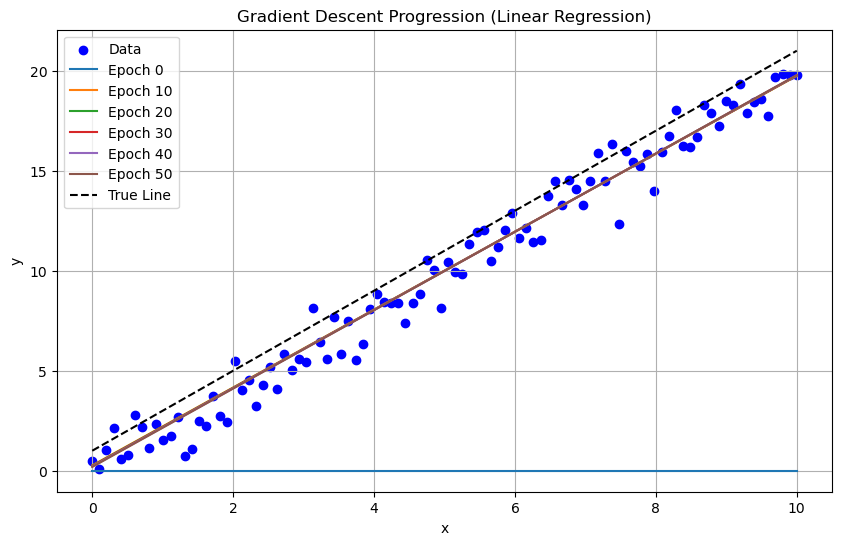

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data')
for i, (w_i, b_i, y_pred_i) in enumerate(history[::10]):
    plt.plot(x, y_pred_i, label=f'Epoch {i * 10}')
plt.plot(x, true_w * x + true_b, 'k--', label='True Line')
plt.legend()
plt.title('Gradient Descent Progression (Linear Regression)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()